In [1]:
from __future__ import print_function #for compatibility beteen python2 and python3


In [138]:
import pandas as pd
from matplotlib import pyplot as plt
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
!curl https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2017.csv > sqf-2017.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5872k  100 5872k    0     0  25.5M      0 --:--:-- --:--:-- --:--:-- 25.6M


In [3]:
!ls $puidata

HW.ipynb  sqf-2017.csv


In [5]:
puidata = os.getenv("PUIDATA")
if not puidata or puidata == '/nfshome/sjs909/PUIdata':
    puidata = '/nfshome/sjs909/PUIDATA'

os.environ["PUIDATA"] = puidata
os.environ["PUIDATA"]

'/nfshome/sjs909/PUIDATA'

In [6]:
#read in the data with pandas

sqf = pd.read_csv("%s/sqf-2017.csv"%os.getenv("PUIDATA"))

In [8]:
#print the fist 8 lines out
sqf.head(8)

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
1,2,1/16/2017,14:26:00,2017,January,Monday,Based on Self Initiated,11617924,APP,SGT,...,(null),(null),180 GREENWICH STREET,(null),GREENWICH STREET,982381,201750,(null),PBMS,MANHATTAN
2,3,2/8/2017,11:10:00,2017,February,Wednesday,Based on C/W on Scene,17020808555,APP,POM,...,C,(null),WALL STREET && BROADWAY,(null),WALL STREET,981005,197131,(null),PBMS,MANHATTAN
3,4,2/20/2017,11:35:00,2017,February,Monday,Based on Self Initiated,9027,APP,POM,...,H,(null),75 GREENE STREET,(null),GREENE STREET,984031,202796,(null),PBMS,MANHATTAN
4,5,2/21/2017,13:20:00,2017,February,Tuesday,Based on Radio Run,10439,APP,POM,...,H,2,429 WEST BROADWAY,(null),WEST BROADWAY,983894,203523,(null),PBMS,MANHATTAN
5,6,2/17/2017,21:25:00,2017,February,Friday,Based on C/W on Scene,22344,APP,POM,...,G,(null),WEST STREET && CHAMBERS STREET,(null),WEST STREET,1043002,213598,(null),PBMS,MANHATTAN
6,7,2/25/2017,20:00:00,2017,February,Saturday,Based on Radio Run,21097,APP,POM,...,G,(null),CHAMBERS STREET && WEST BROADWAY,(null),CHAMBERS STREET,981689,199960,(null),PBMS,MANHATTAN
7,8,2/25/2017,19:58:00,2017,February,Saturday,Based on Radio Run,21097,APP,POM,...,G,(null),CHAMBERS STREET && WEST BROADWAY,(null),CHAMBERS STREET,981689,199960,(null),PBMS,MANHATTAN


In [9]:
#print the last 3 lines out
sqf.tail(3)

,STOP_FRISK_ID,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,SPRINT_NUMBER,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,...,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_PREMISES_NAME,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
11626,11627,10/7/2017,23:45:00,2017,October,Saturday,Based on Self Initiated,NONE,APP,POM,...,(null),(null),(null),(null),(null),,,(null),(nul,(null)
11627,11628,12/26/2017,15:25:00,2017,December,Tuesday,Based on Self Initiated,0,APP,POM,...,(null),(null),(null),(null),(null),,,(null),(nul,(null)
11628,11629,11/12/2017,22:55:00,2017,November,Sunday,Based on Self Initiated,0,APP,POM,...,(null),(null),(null),(null),(null),,,(null),(nul,(null)


In [10]:
#look at the columns available, those are the variables
sqf.columns

Index(['STOP_FRISK_ID', 'STOP_FRISK_DATE', 'STOP_FRISK_TIME', 'YEAR2',
       'MONTH2', 'DAY2', 'STOP_WAS_INITIATED', 'SPRINT_NUMBER',
       'RECORD_STATUS_CODE', 'ISSUING_OFFICER_RANK',
       'ISSUING_OFFICER_COMMAND_CODE', 'SUPERVISING_OFFICER_RANK',
       'SUPERVISING_OFFICER_COMMAND_CODE',
       'SUPERVISING_ACTION_CORRESPONDING_ACTIVITY_LOG_ENTRY_REVIEWED',
       'LOCATION_IN_OUT_CODE', 'JURISDICTION_CODE', 'JURISDICTION_DESCRIPTION',
       'OBSERVED_DURATION_MINUTES', 'SUSPECTED_CRIME_DESCRIPTION',
       'STOP_DURATION_MINUTES', 'OFFICER_EXPLAINED_STOP_FLAG',
       'OFFICER_NOT_EXPLAINED_STOP_DESCRIPTION', 'OTHER_PERSON_STOPPED_FLAG',
       'SUSPECT_ARRESTED_FLAG', 'SUSPECT_ARREST_NUMBER',
       'SUSPECT_ARREST_OFFENSE', 'SUMMONS_ISSUED_FLAG', 'SUMMONS_NUMBER',
       'SUMMONS_OFFENSE_DESCRIPTION', 'OFFICER_IN_UNIFORM_FLAG',
       'ID_CARD_IDENTIFIES_OFFICER_FLAG', 'SHIELD_IDENTIFIES_OFFICER_FLAG',
       'VERBAL_IDENTIFIES_OFFICER_FLAG', 'FRISKED_FLAG', 'SEARCHED_FLAG

In [11]:
#count how many rows, those are the data points
sqf.size

1000094

In [99]:
#select 2 columns only for plotting
sqf_2c = sqf[['SUSPECT_REPORTED_AGE', 'STOP_DURATION_MINUTES']]

In [137]:
sqf_2c.head()


,SUSPECT_REPORTED_AGE,STOP_DURATION_MINUTES
10727,0,8
11569,0,10
4532,0,15
9927,0,15
10538,1,10


In [109]:
sqf_2c.dtypes
sqf_2c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11003 entries, 0 to 11628
Data columns (total 2 columns):
SUSPECT_REPORTED_AGE     11003 non-null object
STOP_DURATION_MINUTES    11003 non-null int64
dtypes: int64(1), object(1)
memory usage: 257.9+ KB


In [126]:
#Delete rows with null data and sort values of age
sqf_2c['SUSPECT_REPORTED_AGE'].replace('(null)', np.nan, inplace=True)
sqf_2c.dropna(subset=['SUSPECT_REPORTED_AGE'], inplace=True)
sqf_2c.sort_values('SUSPECT_REPORTED_AGE', inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:3443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

Text(0.5,1,'Suspect Age and Amount of Time Stopped')

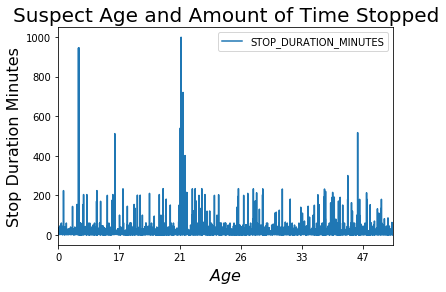

In [135]:
sqf_2c.plot(x='SUSPECT_REPORTED_AGE', y='STOP_DURATION_MINUTES')
plt.xlabel(r'$Age$', fontsize = 16)
plt.ylabel('Stop Duration Minutes', fontsize = 16)
plt.title(r'Suspect Age and Amount of Time Stopped', fontsize = 20)
# every plot needs a caption that explains to the reader 
# 1) WHAT what the reader is loooking at and 
# 2) WHY why the reader is looking at it here in the analysis 
#      (in this case there is no why cause this plot is not part of an analysis)
# 3) TAKE HOME what is the take home point for the plot in the analysis 
#      (also there is no take home point here cause we are not doind an analysis but you can point out interesting features)

Figure 1. This is a graph that plots The Stop, Question and Frisk data from the NYC Open Database reported by the Police Department (NYPD) for the year of 2017. It shows the age of the suspect compared to the time that they were stopped. It is interesting to see the spike in time for suspects of the approximate age of 12, 21 and 45. Perhaps there are just more suspects being stopped at these ages or it takes the Police Department longer to stop this age demographic.  

Text(0.5,1,'Suspect Age and Amount of Time Stopped')

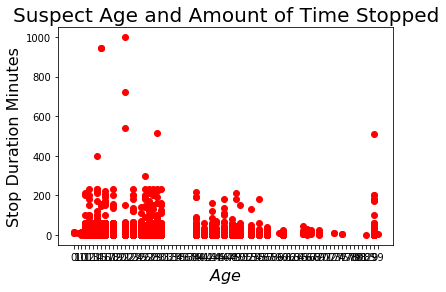

In [143]:
plt.scatter(x=sqf_2c['SUSPECT_REPORTED_AGE'], y=sqf_2c['STOP_DURATION_MINUTES'],c='r')
plt.xlabel(r'$Age$', fontsize = 16)
plt.ylabel('Stop Duration Minutes', fontsize = 16)
plt.title(r'Suspect Age and Amount of Time Stopped', fontsize = 20)